1. who gets more loan approvals men or women?
2. how loan approval dependent on age, education, income
3. Credit Score Influence: Higher credit scores lead to higher loan approval rates.
4. Previous Defaults Impact: Applicants with previous loan defaults are less likely to get approved.
5. Home Ownership Effect: Homeowners (OWN or MORTGAGE) have higher approval rates than renters.
6. Credit History Length: A longer credit history increases the likelihood of loan approval.
7. Income vs. Interest Rate: Higher-income individuals receive lower interest rates on loans.
8. Loan Intent Relation: The purpose of the loan (e.g., EDUCATION, MEDICAL) affects approval chances.
9. Education Level: Higher education levels correlate with higher loan amounts approved.
10. Employment Experience: More years of employment experience increase approval rates.
11. Loan Amount Requested: Larger loan amounts decrease the likelihood of approval.
12. Loan Percent Income: A higher loan-to-income ratio reduces the chance of loan approval.

how to increase your loan approval rate?

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Clean the data

In [319]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [320]:
# Standardize categorical variables
df['person_gender'] = df['person_gender'].str.capitalize()
df['person_education'] = df['person_education'].replace({
    'Master': "Master's",
    'Bachelor': "Bachelor's",
    'High School': 'High School'
})
df['person_home_ownership'] = df['person_home_ownership'].str.capitalize()
df['loan_intent'] = df['loan_intent'].str.capitalize()
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].str.capitalize()

In [321]:
# Correct data types
# Convert numerical columns to appropriate types
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
            'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
df[num_cols] = df[num_cols].apply(pd.to_numeric)

In [322]:
# Rename columns for clarity
df.rename(columns={
    'person_age': 'Person_Age',
    'person_gender': 'Person_Gender',
    'person_education': 'Person_Education',
    'person_income': 'Person_Income',
    'person_emp_exp': 'Person_Employment_Experience',
    'person_home_ownership': 'Person_Home_Ownership',
    'loan_amnt': 'Loan_Amount',
    'loan_intent': 'Loan_Intent',
    'loan_int_rate': 'Loan_Interest_Rate',
    'loan_percent_income': 'Loan_Percent_Income',
    'cb_person_cred_hist_length': 'Credit_History_Length',
    'credit_score': 'Credit_Score',
    'previous_loan_defaults_on_file': 'Previous_Loan_Defaults',
    'loan_status': 'Loan_Status'
}, inplace=True)

In [323]:
# Convert 'Loan_Status' from numerical to categorical
df['Loan_Status'] = df['Loan_Status'].map({1: 'Approved', 0: 'Denied'})

In [324]:
# Ensure 'Previous_Loan_Defaults' contains consistent 'Yes'/'No' values
df['Previous_Loan_Defaults'] = df['Previous_Loan_Defaults'].map({'Yes': 'Yes', 'No': 'No'})

In [325]:
# Format percentages and monetary values
df['Loan_Interest_Rate'] = df['Loan_Interest_Rate'].map('{:,.2f}%'.format)
df['Loan_Percent_Income'] = df['Loan_Percent_Income'].map('{:,.0%}'.format)
df['Person_Income'] = df['Person_Income'].map('${:,.2f}'.format)
df['Loan_Amount'] = df['Loan_Amount'].map('${:,.2f}'.format)

In [326]:
df.head()

,Person_Age,Person_Gender,Person_Education,Person_Income,Person_Employment_Experience,Person_Home_Ownership,Loan_Amount,Loan_Intent,Loan_Interest_Rate,Loan_Percent_Income,Credit_History_Length,Credit_Score,Previous_Loan_Defaults,Loan_Status
0,22.0,Female,Master's,"$71,948.00",0,Rent,"$35,000.00",Personal,16.02%,49%,3.0,561,No,Approved
1,21.0,Female,High School,"$12,282.00",0,Own,"$1,000.00",Education,11.14%,8%,2.0,504,Yes,Denied
2,25.0,Female,High School,"$12,438.00",3,Mortgage,"$5,500.00",Medical,12.87%,44%,3.0,635,No,Approved
3,23.0,Female,Bachelor's,"$79,753.00",0,Rent,"$35,000.00",Medical,15.23%,44%,2.0,675,No,Approved
4,24.0,Male,Master's,"$66,135.00",1,Rent,"$35,000.00",Medical,14.27%,53%,4.0,586,No,Approved


### Education Level: Higher education levels correlate with higher loan amounts approved.

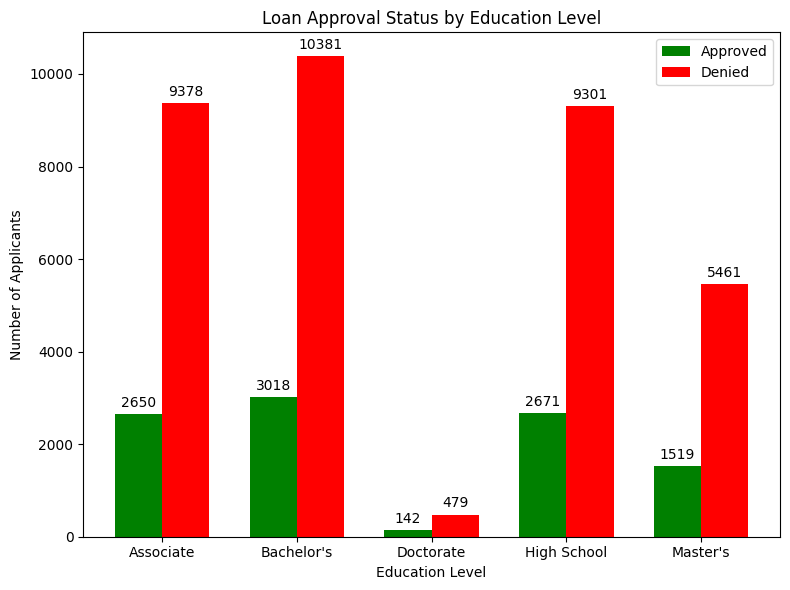

In [327]:
analysis_df = df[['Person_Education', 'Loan_Status']]
education_loan_status = analysis_df.groupby(['Person_Education', 'Loan_Status']).size().unstack(fill_value=0)

# Plotting 
labels = education_loan_status.index
approved = education_loan_status['Approved'] if 'Approved' in education_loan_status.columns else [0]*len(labels)
denied = education_loan_status['Denied'] if 'Denied' in education_loan_status.columns else [0]*len(labels)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8,6))

# Plot bars for 'Approved' and 'Denied'
rects1 = ax.bar(x - width/2, approved, width, label='Approved', color='green')
rects2 = ax.bar(x + width/2, denied, width, label='Denied', color='red')

ax.set_xlabel('Education Level')
ax.set_ylabel('Number of Applicants')
ax.set_title('Loan Approval Status by Education Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in rects, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


Analysis of the Chart
Key Observations:

High School: A significantly higher number of applications were denied compared to approvals.

Bachelor's and Associate's Degrees: Similar trends are observed, with denials outnumbering approvals, but the absolute number of applications is higher than for 

High School graduates.

Master's Degree: There are still more denials than approvals, though the approval numbers seem relatively higher compared to lower education levels.

Doctorate: The number of applications is much smaller, and denials dominate this group.

Higher education levels, such as Master's and Doctorate, seem to improve the likelihood of approval compared to lower levels, but even here, denials dominate.
The trend suggests that while education level influences approval rates, it is not the sole factor. Other variables such as income, credit score, or employment history likely play a significant role.

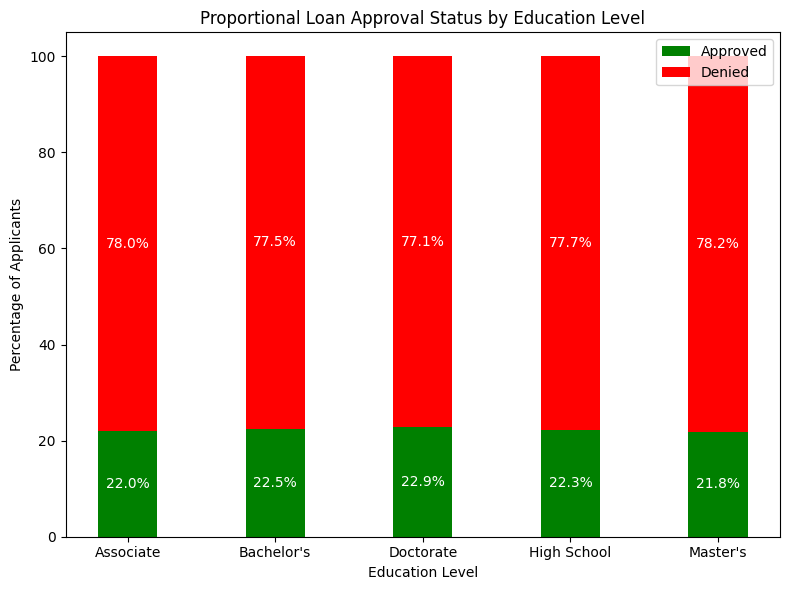

In [328]:
# Calculate percentages for each Loan_Status within each Education level
education_loan_status['Total'] = education_loan_status.sum(axis=1)
education_loan_status['Approved_Percentage'] = (education_loan_status['Approved'] / education_loan_status['Total']) * 100
education_loan_status['Denied_Percentage'] = (education_loan_status['Denied'] / education_loan_status['Total']) * 100

# Plot the proportional data
labels = education_loan_status.index
approved_percentages = education_loan_status['Approved_Percentage']
denied_percentages = education_loan_status['Denied_Percentage']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

# Create stacked bar chart for percentages
p1 = ax.bar(x, approved_percentages, width, label='Approved', color='green')
p2 = ax.bar(x, denied_percentages, width, bottom=approved_percentages, label='Denied', color='red')

# Add labels, title, and legend
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage of Applicants')
ax.set_title('Proportional Loan Approval Status by Education Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate percentages
for i, (appr, deny) in enumerate(zip(approved_percentages, denied_percentages)):
    ax.text(i, appr / 2, f'{appr:.1f}%', ha='center', va='center', color='white')
    ax.text(i, appr + deny / 2, f'{deny:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


Overall Denials Dominate:

Across all education levels, the proportion of denials consistently hovers around 77-78%, indicating a general trend of low loan approval rates.
Minimal Variation Across Education Levels:

The proportion of approvals (green bars) and denials (red bars) is relatively stable, regardless of the education level:
Associate's: 22.0% approvals, 78.0% denials.
Bachelor's: 22.5% approvals, 77.5% denials.
Doctorate: 22.9% approvals, 77.1% denials.
High School: 22.3% approvals, 77.7% denials.
Master's: 21.8% approvals, 78.2% denials.
Highest Approval Rate:

Applicants with a Doctorate have the highest approval rate at 22.9%.
Lowest Approval Rate:

Applicants with a Master's Degree have the lowest approval rate at 21.8%, which is slightly lower than others.

Education Level Alone May Not Be a Decisive Factor:

The similar approval and denial percentages across all education levels suggest that education level alone is not a strong determinant for loan approval.
Other factors, such as income, credit score, employment history, and loan amount, might have a more significant impact.
High Denial Rates Across All Levels:

The consistently high denial rates could indicate strict loan approval criteria or a general lack of eligibility among applicants, regardless of education level.
Doctorate Applicants:

Although they have the highest approval percentage, the difference is marginal and not statistically significant in this dataset.

### Let's look at income data

In [329]:
df['Person_Income'] = df['Person_Income'].replace('[\$,]', '', regex=True).astype(float)

# Create Income Groups
bins = [0, 20000, 40000, 60000, 80000, 100000]  # Define income ranges
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k']  # Labels for income groups
df['Income_Group'] = pd.cut(df['Person_Income'], bins=bins, labels=labels)

# Group Data by Income_Group and Loan_Status
income_loan_status = df.groupby(['Income_Group', 'Loan_Status']).size().unstack(fill_value=0)

print("Grouped Data by Income:")
print(income_loan_status)

Grouped Data by Income:
Loan_Status   Approved  Denied
Income_Group                  
0-20k              637     127
20k-40k           2739    3862
40k-60k           2819    8102
60k-80k           1888    8414
80k-100k           971    5417


/tmp/ipykernel_962/1181298578.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_loan_status = df.groupby(['Income_Group', 'Loan_Status']).size().unstack(fill_value=0)


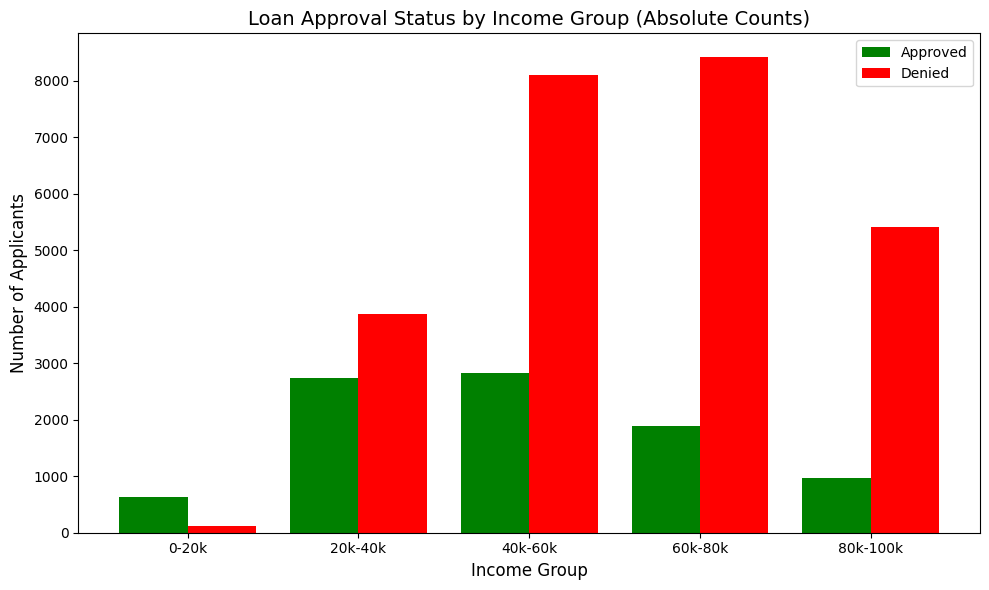

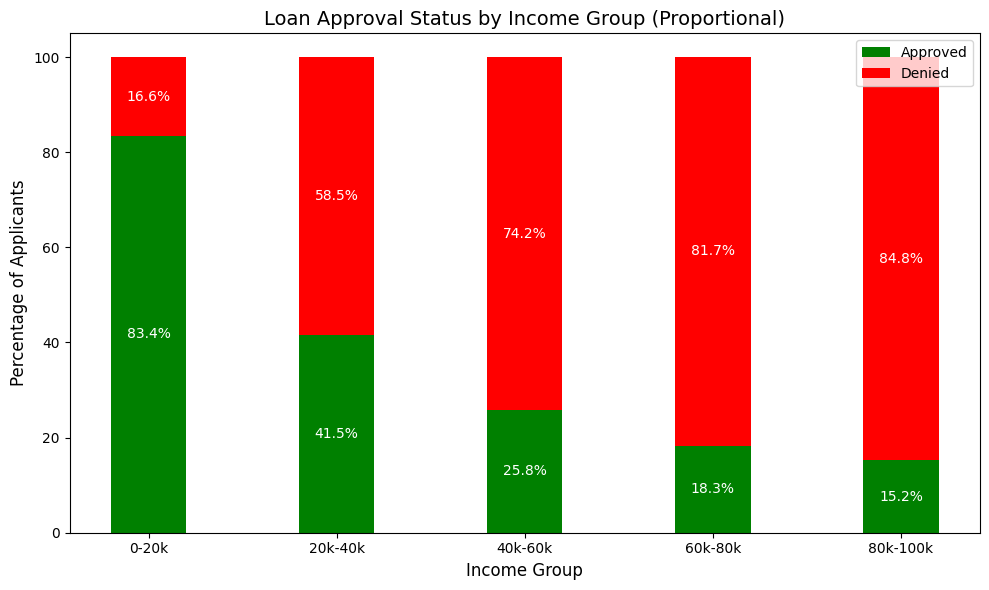

In [330]:
# Calculate totals and proportions for proportional chart
income_loan_status['Total'] = income_loan_status['Approved'] + income_loan_status['Denied']
income_loan_status['Approved_Percentage'] = (income_loan_status['Approved'] / income_loan_status['Total']) * 100
income_loan_status['Denied_Percentage'] = (income_loan_status['Denied'] / income_loan_status['Total']) * 100

# Define positions for bar plots
x = range(len(income_loan_status.index))
width = 0.4

# Absolute counts bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([pos - width/2 for pos in x], income_loan_status['Approved'], width, label='Approved', color='green')
ax.bar([pos + width/2 for pos in x], income_loan_status['Denied'], width, label='Denied', color='red')

# Customize the plot
ax.set_title('Loan Approval Status by Income Group (Absolute Counts)', fontsize=14)
ax.set_xlabel('Income Group', fontsize=12)
ax.set_ylabel('Number of Applicants', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(income_loan_status.index, fontsize=10)
ax.legend()
plt.tight_layout()
plt.show()

# Proportional bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, income_loan_status['Approved_Percentage'], width, label='Approved', color='green')
ax.bar(x, income_loan_status['Denied_Percentage'], width, bottom=income_loan_status['Approved_Percentage'], label='Denied', color='red')

# Customize the plot
ax.set_title('Loan Approval Status by Income Group (Proportional)', fontsize=14)
ax.set_xlabel('Income Group', fontsize=12)
ax.set_ylabel('Percentage of Applicants', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(income_loan_status.index, fontsize=10)
ax.legend()

# Annotate bars with percentages
for i, (appr, deny) in enumerate(zip(income_loan_status['Approved_Percentage'], income_loan_status['Denied_Percentage'])):
    ax.text(i, appr / 2, f'{appr:.1f}%', ha='center', va='center', color='white', fontsize=10)
    ax.text(i, appr + deny / 2, f'{deny:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

Key Observations:

0-20k Income Group:
Significantly more approved applications than denied ones.
Represents the highest approval rate compared to other groups.
20k-40k Income Group:
Denials dominate this group, with a smaller but notable number of approvals.
40k-60k Income Group:
Denials continue to outnumber approvals by a significant margin.
60k-80k Income Group:
Very few approvals and a sharp increase in the number of denials compared to the previous group.
80k-100k Income Group:
The trend of denials dominating approvals is most pronounced in this group, showing the largest discrepancy.
Insights:
Applicants in the 0-20k income group have the highest absolute number of approvals, likely due to fewer risks associated with their loans or potentially smaller loan requests.
Approval numbers consistently drop as income increases, which might seem counterintuitive and may warrant deeper exploration of other factors influencing these trends (e.g., credit score, loan amount).


Key Observations:

0-20k Income Group:
83.4% approved and only 16.6% denied—the highest approval rate across all income groups.
20k-40k Income Group:
Approval percentage drops sharply to 41.5%, with 58.5% denied.
40k-60k Income Group:
Approval percentage continues to decline to 25.8%, with denials making up 74.2% of applications.
60k-80k Income Group:
Approval rate further drops to 18.3%, with 81.7% denied.
80k-100k Income Group:
The lowest approval rate at 15.2%, with the highest denial rate at 84.8%.
Insights:
Approval rates decrease steadily as income increases, while denial rates increase. This could indicate that higher-income applicants are applying for larger loans or riskier terms that are more likely to be denied.
The 0-20k income group stands out with an extremely high approval rate, which could be due to smaller loan requests or other factors that make them less risky to lenders.

Overall Analysis
Approval Trends:

Contrary to typical expectations, higher-income groups are not favored for loan approvals. This suggests that factors other than income, such as loan amount requested, credit history, or previous defaults, might play a more significant role in approval decisions.
Significance of the 0-20k Group:

This group has the highest approval rate, possibly because their loan applications are more modest or align better with lender expectations.
Potential Bias Against Higher-Income Groups:

The steep decline in approval rates for higher-income groups may indicate that lenders perceive these applicants as higher-risk, potentially due to larger loan amounts or financial liabilities not reflected in the income figures.

выглядит как хуйня. надо проверять...

/tmp/ipykernel_962/933501175.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_group_analysis = df.groupby('Loan_Amount_Group')['Loan_Status_Numeric'].mean().reset_index()
posx and posy should be finite values
posx and posy should be finite values


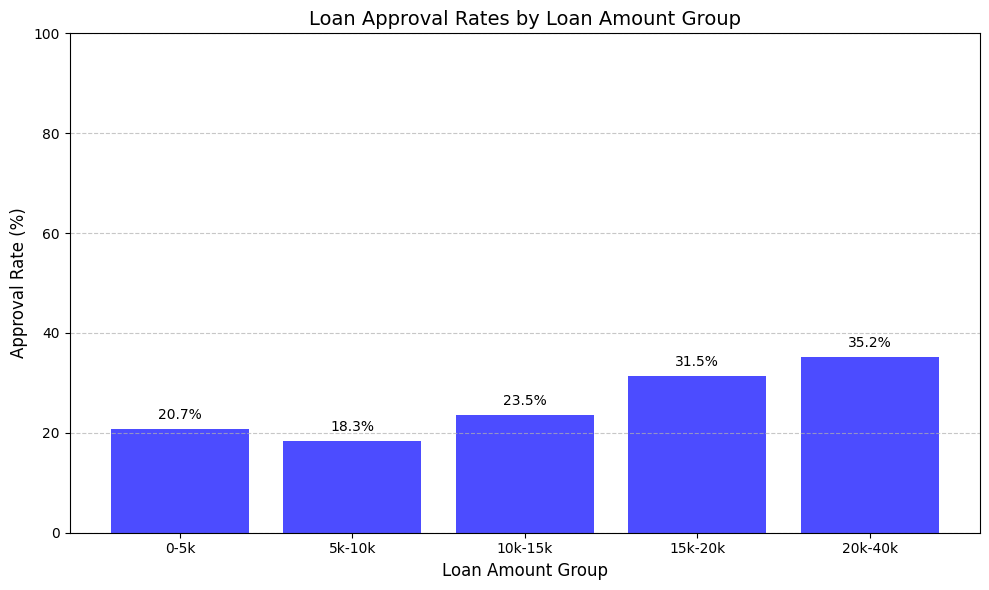

In [331]:
# Clean and convert Loan_Amount column to numeric
df['Loan_Amount'] = df['Loan_Amount'].replace('[\$,]', '', regex=True).astype(float)

# Define bins and labels for loan amount groups
bins = [0, 5000, 10000, 15000, 20000, 40000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-40k', '>40k']

# Group Loan_Amount into bins
df['Loan_Amount_Group'] = pd.cut(df['Loan_Amount'], bins=bins, labels=labels)

# Remove invalid rows
df = df.dropna(subset=['Loan_Amount', 'Loan_Amount_Group'])

# Add numeric Loan_Status for calculation
df['Loan_Status_Numeric'] = df['Loan_Status'].map({'Approved': 1, 'Denied': 0})

# Calculate approval rates within each loan amount group
loan_group_analysis = df.groupby('Loan_Amount_Group')['Loan_Status_Numeric'].mean().reset_index()
loan_group_analysis.rename(columns={'Loan_Status_Numeric': 'Approval_Rate'}, inplace=True)


# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(loan_group_analysis['Loan_Amount_Group'], loan_group_analysis['Approval_Rate'] * 100, color='blue', alpha=0.7)
plt.title('Loan Approval Rates by Loan Amount Group', fontsize=14)
plt.xlabel('Loan Amount Group', fontsize=12)
plt.ylabel('Approval Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, rate in enumerate(loan_group_analysis['Approval_Rate'] * 100):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


we can see that loan amount is not a significant factor in determining approval status. the guess here would that the success depends not only on the amount of the loan, but also on the income of the applicant.

посмотрим как выглядят успешные лоаны для разных групп по индексу дохода

In [332]:
print(df['Loan_Status'].unique())

['Approved' 'Denied']


/tmp/ipykernel_962/1927764139.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_distribution = df_approved.groupby(['Income_Group', 'Loan_Amount_Group']).size().unstack(fill_value=0)


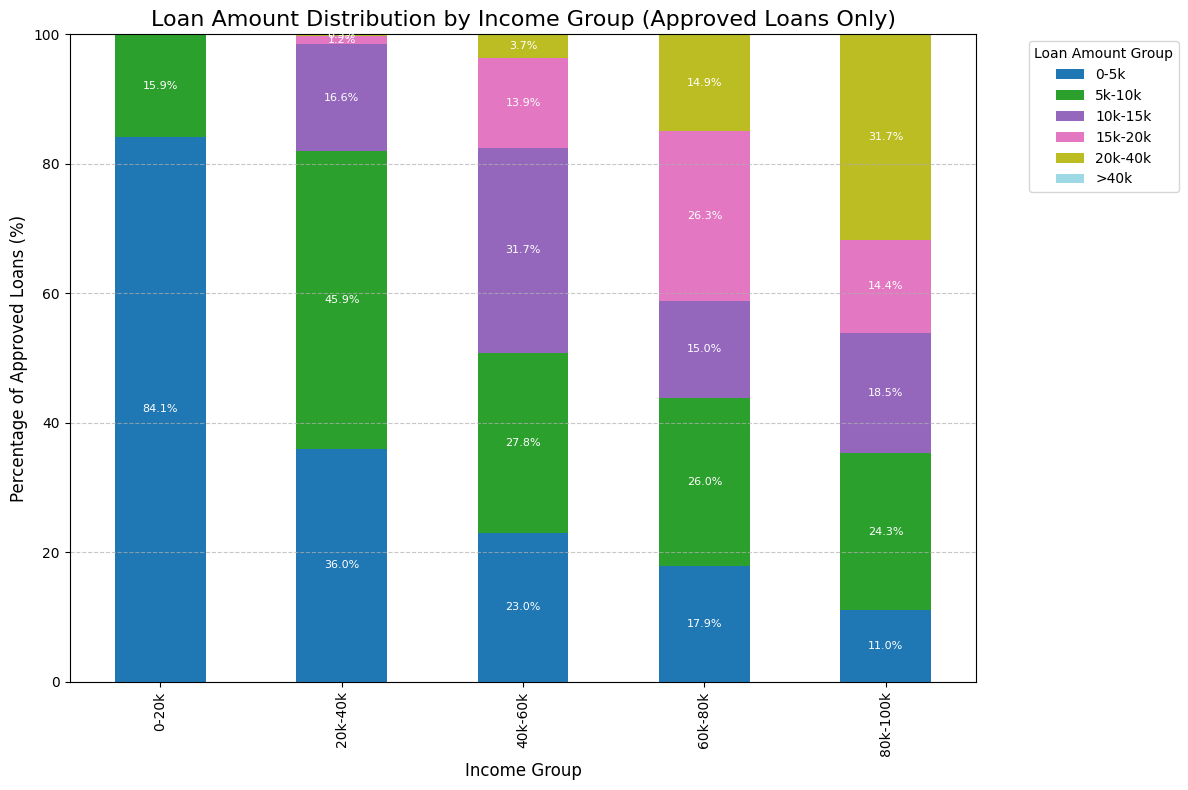

In [333]:
# Ensure 'Person_Income' is numeric
df['Person_Income'] = df['Person_Income'].replace('[\$,]', '', regex=True).astype(float)

# Ensure 'Loan_Amount' is numeric
df['Loan_Amount'] = df['Loan_Amount'].replace('[\$,]', '', regex=True).astype(float)

# Create Income Groups
bins_income = [0, 20000, 40000, 60000, 80000, 100000]
labels_income = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k']
df['Income_Group'] = pd.cut(df['Person_Income'], bins=bins_income, labels=labels_income)

# Define bins and labels for Loan_Amount_Group
bins_loan = [0, 5000, 10000, 15000, 20000, 40000, float('inf')]
labels_loan = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-40k', '>40k']
df['Loan_Amount_Group'] = pd.cut(df['Loan_Amount'], bins=bins_loan, labels=labels_loan)

# Remove invalid rows (if any)
df_cleaned = df.dropna(subset=['Income_Group', 'Loan_Amount_Group'])

# **Filter only for plotting without modifying the original DataFrame**
df_approved = df_cleaned[df_cleaned['Loan_Status'] == 'Approved']

# Prepare data for plotting
# Create a cross-tabulation of counts
loan_amount_distribution = df_approved.groupby(['Income_Group', 'Loan_Amount_Group']).size().unstack(fill_value=0)

# Calculate percentages for each Income_Group
loan_amount_percentages = loan_amount_distribution.div(loan_amount_distribution.sum(axis=1), axis=0) * 100

# Ensure all loan amount groups are included in the DataFrame
loan_amount_percentages = loan_amount_percentages[labels_loan]

# Plot a stacked bar chart
ax = loan_amount_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Loan Amount Distribution by Income Group (Approved Loans Only)', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Percentage of Approved Loans (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Amount Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i in range(len(loan_amount_percentages)):
    cumulative = 0
    for loan_group in labels_loan:
        value = loan_amount_percentages.iloc[i][loan_group]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()

now we can see that it is impossible to judge the apporval rate of a loan without knowing the loan amount and the income of the applicant. but if we want to find the most successful person, we can choose the person that's income is 0-20k and the loan is from 0 to 5k.

lets look at other qualities of a successful loan applicant

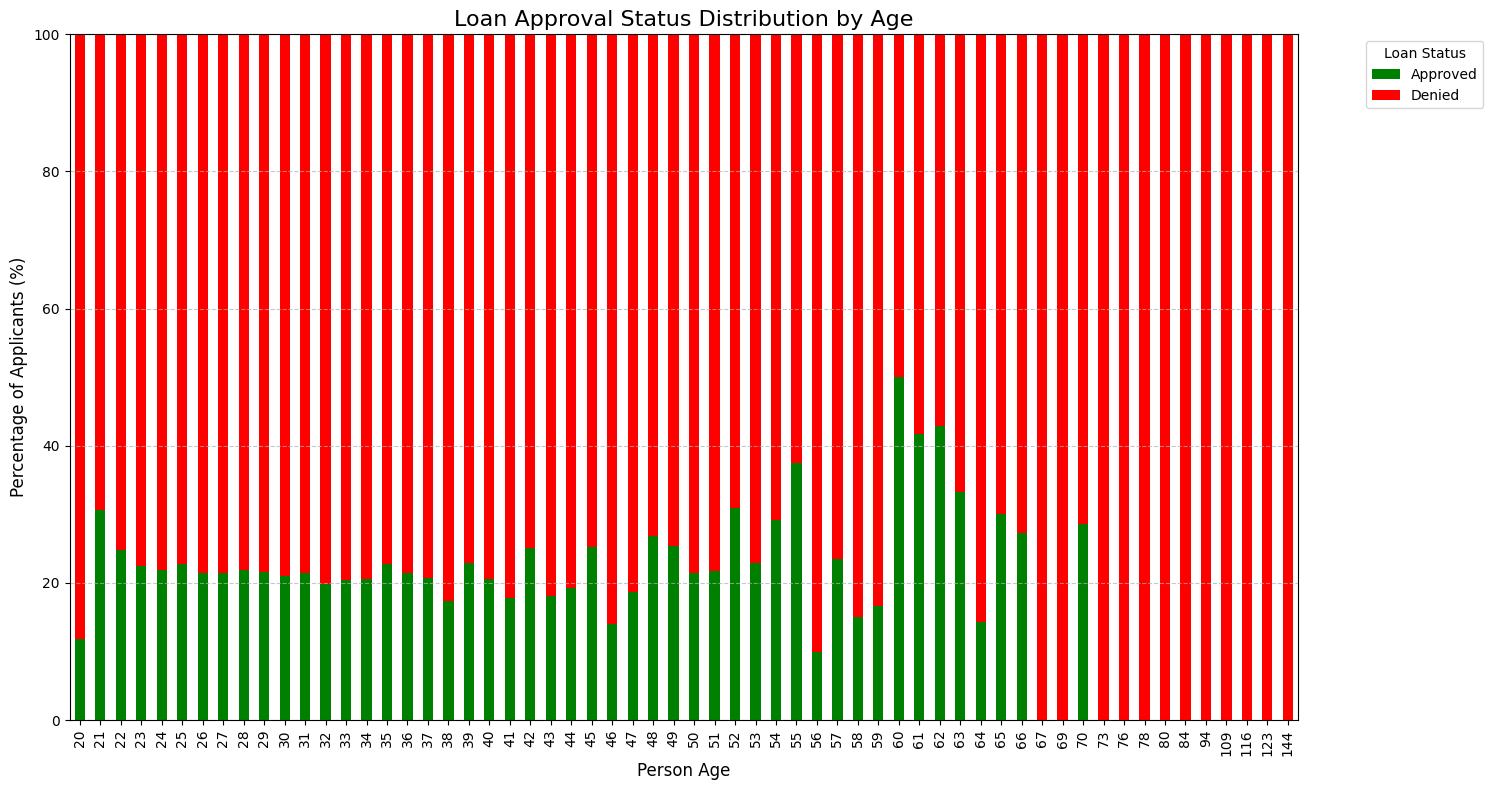

In [334]:
# Ensure 'Person_Age' is numeric
df['Person_Age'] = pd.to_numeric(df['Person_Age'], errors='coerce')

# Remove invalid ages (if any)
df = df.dropna(subset=['Person_Age'])

# Convert 'Person_Age' to integer (optional, if ages are whole numbers)
df['Person_Age'] = df['Person_Age'].astype(int)

# Prepare data for plotting
# Create a cross-tabulation of counts
age_loan_status = df.groupby(['Person_Age', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each age
age_loan_status_percentages = age_loan_status.div(age_loan_status.sum(axis=1), axis=0) * 100

# Ensure the Loan_Status columns are in the desired order and include both statuses
loan_status_categories = ['Approved', 'Denied']
age_loan_status_percentages = age_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot a stacked bar chart
ax = age_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(15, 8), color=['green', 'red'])

plt.title('Loan Approval Status Distribution by Age', fontsize=16)
plt.xlabel('Person Age', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

graph looks pretty even, so lets look at other variables

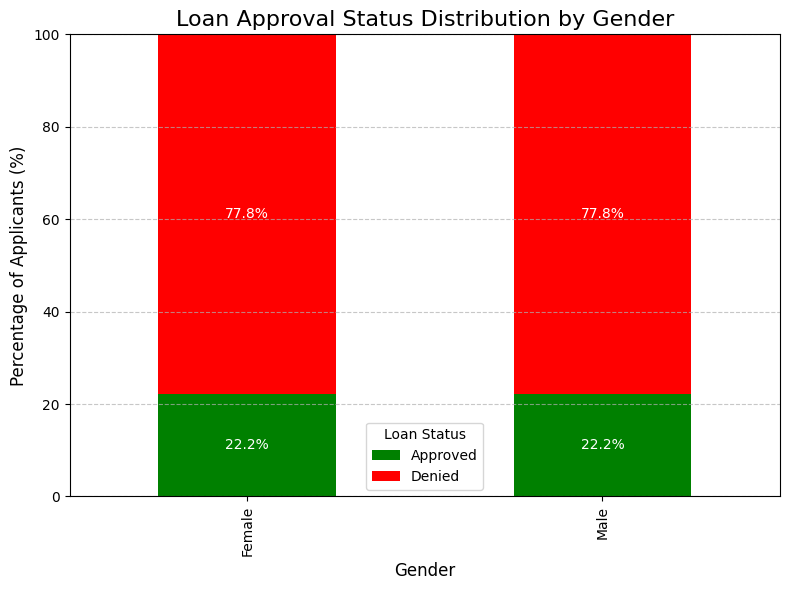

In [335]:
# Create a copy of the relevant columns to avoid modifying the original DataFrame
df_gender = df[['Person_Gender', 'Loan_Status']].copy()

# Standardize and clean the data
df_gender['Person_Gender'] = df_gender['Person_Gender'].str.strip().str.capitalize()
df_gender['Loan_Status'] = df_gender['Loan_Status'].str.strip().str.capitalize()

# Create a cross-tabulation of counts
gender_loan_status = df_gender.groupby(['Person_Gender', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each gender
gender_loan_status_percentages = gender_loan_status.div(gender_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
loan_status_categories = ['Approved', 'Denied']
gender_loan_status_percentages = gender_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = gender_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Loan Approval Status Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, gender in enumerate(gender_loan_status_percentages.index):
    cumulative = 0
    for status in loan_status_categories:
        value = gender_loan_status_percentages.loc[gender][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

nothing to say here

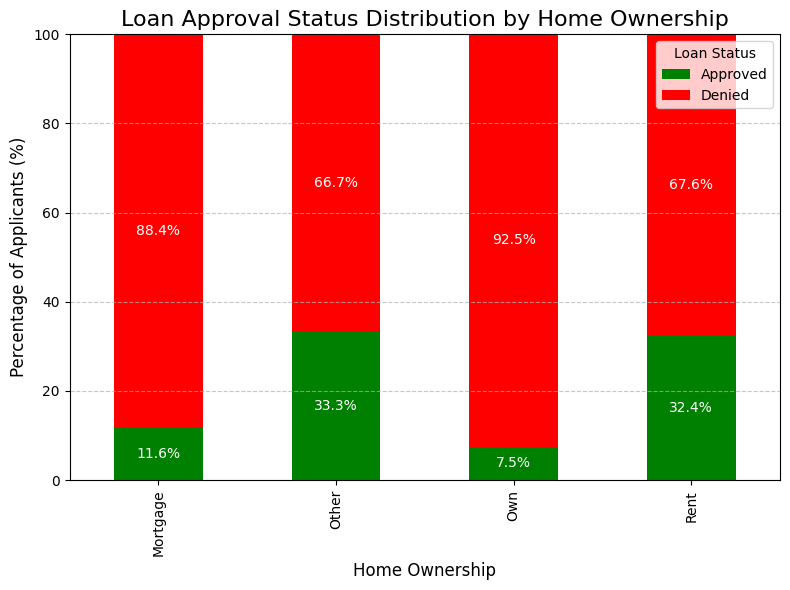

In [336]:
# Create a copy to avoid modifying the original DataFrame
df_home = df[['Person_Home_Ownership', 'Loan_Status']].copy()

# Standardize and clean the data
df_home['Person_Home_Ownership'] = df_home['Person_Home_Ownership'].str.strip().str.capitalize()
df_home['Loan_Status'] = df_home['Loan_Status'].str.strip().str.capitalize()

# Create a cross-tabulation of counts
home_loan_status = df_home.groupby(['Person_Home_Ownership', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each home ownership type
home_loan_status_percentages = home_loan_status.div(home_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
home_loan_status_percentages = home_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = home_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Loan Approval Status Distribution by Home Ownership', fontsize=16)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, ownership in enumerate(home_loan_status_percentages.index):
    cumulative = 0
    for status in loan_status_categories:
        value = home_loan_status_percentages.loc[ownership][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

The chart presents the loan approval and denial rates categorized by the type of home ownership. It is a stacked bar chart where the red segments represent denied loans and the green segments represent approved loans. Here is a detailed analysis:

1. General Trends
Across all home ownership categories, the proportion of denied loans (red) is consistently higher than approved loans (green).
The denial rates vary significantly depending on the type of home ownership.
2. Breakdown by Home Ownership Categories
Mortgage:
Denial Rate: 88.4%
Approval Rate: 11.6%
This group experiences one of the highest denial rates, indicating applicants with mortgages are less likely to have their loans approved.
Other:
Denial Rate: 66.7%
Approval Rate: 33.3%
This category shows a relatively better approval rate compared to others, with one-third of the applicants having their loans approved.
Own:
Denial Rate: 92.5%
Approval Rate: 7.5%
The group with the highest denial rate, indicating owning a home outright may not be a significant advantage for loan approval in this dataset.
Rent:
Denial Rate: 67.6%
Approval Rate: 32.4%
Similar to the "Other" category, renters have a relatively higher approval rate compared to mortgage holders and homeowners.
3. Key Observations
Applicants categorized under "Own" face a surprisingly high denial rate (92.5%), which contradicts the general assumption that owning a home outright may lead to better loan approval chances. This may indicate additional underlying factors influencing the decisions.
"Other" and "Rent" categories have the most favorable approval rates, suggesting less stringent criteria for these groups or differences in applicant profiles.
Applicants with a mortgage face a lower denial rate compared to those who own their homes outright, which could imply that having a mortgage is less of a deterrent than expected.

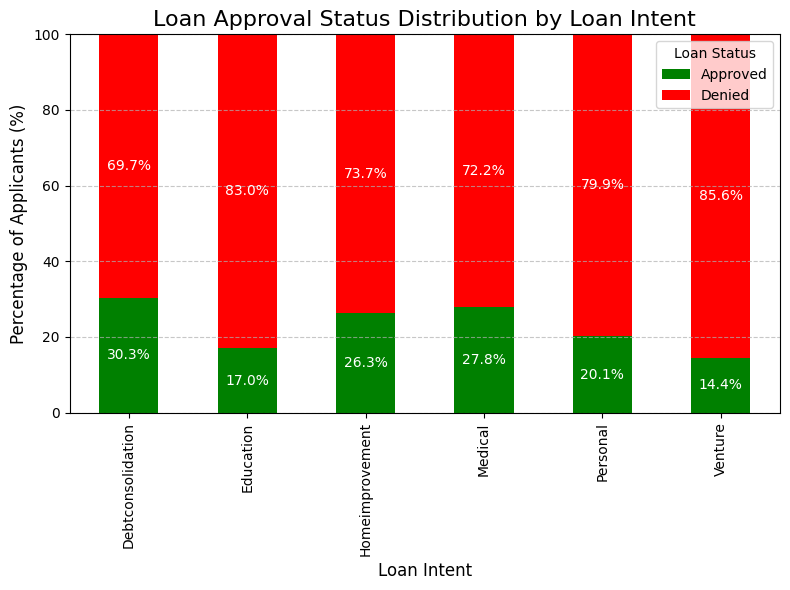

In [337]:
# Create a copy to avoid modifying the original DataFrame
df_intent = df[['Loan_Intent', 'Loan_Status']].copy()

# Standardize and clean the data
df_intent['Loan_Intent'] = df_intent['Loan_Intent'].str.strip().str.capitalize()
df_intent['Loan_Status'] = df_intent['Loan_Status'].str.strip().str.capitalize()

# Create a cross-tabulation of counts
intent_loan_status = df_intent.groupby(['Loan_Intent', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each loan intent
intent_loan_status_percentages = intent_loan_status.div(intent_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
intent_loan_status_percentages = intent_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = intent_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Loan Approval Status Distribution by Loan Intent', fontsize=16)
plt.xlabel('Loan Intent', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, intent in enumerate(intent_loan_status_percentages.index):
    cumulative = 0
    for status in loan_status_categories:
        value = intent_loan_status_percentages.loc[intent][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


/tmp/ipykernel_962/1280158029.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  history_loan_status = df_history.groupby(['Credit_History_Group', 'Loan_Status']).size().unstack(fill_value=0)


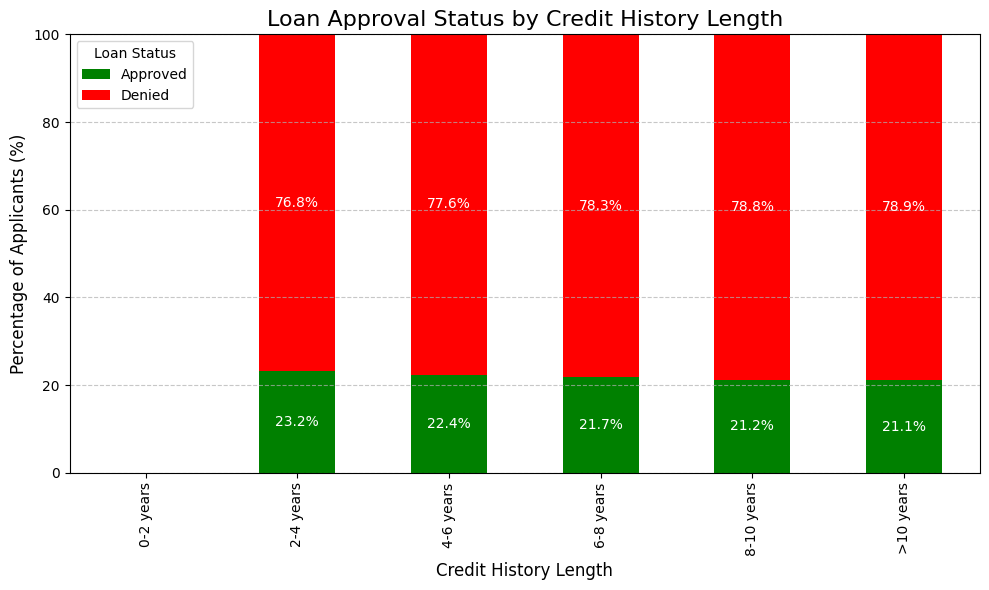

In [338]:
# Create a copy to avoid modifying the original DataFrame
df_history = df[['Credit_History_Length', 'Loan_Status']].copy()

# Ensure 'Credit_History_Length' is numeric
df_history['Credit_History_Length'] = pd.to_numeric(df_history['Credit_History_Length'], errors='coerce')

# Remove invalid rows
df_history = df_history.dropna(subset=['Credit_History_Length', 'Loan_Status'])

# Bin Credit History Length into categories
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2 years', '2-4 years', '4-6 years', '6-8 years', '8-10 years', '>10 years']
df_history['Credit_History_Group'] = pd.cut(df_history['Credit_History_Length'], bins=bins, labels=labels, right=False)

# Standardize and clean the data
df_history['Loan_Status'] = df_history['Loan_Status'].str.strip().str.capitalize()

# Create a cross-tabulation of counts
history_loan_status = df_history.groupby(['Credit_History_Group', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each credit history group
history_loan_status_percentages = history_loan_status.div(history_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
history_loan_status_percentages = history_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = history_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Loan Approval Status by Credit History Length', fontsize=16)
plt.xlabel('Credit History Length', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(history_loan_status_percentages.index):
    cumulative = 0
    for status in loan_status_categories:
        value = history_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

/tmp/ipykernel_962/3943083564.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  history_loan_status = df_history.groupby(['Credit_History_Group', 'Loan_Status']).size().unstack(fill_value=0)


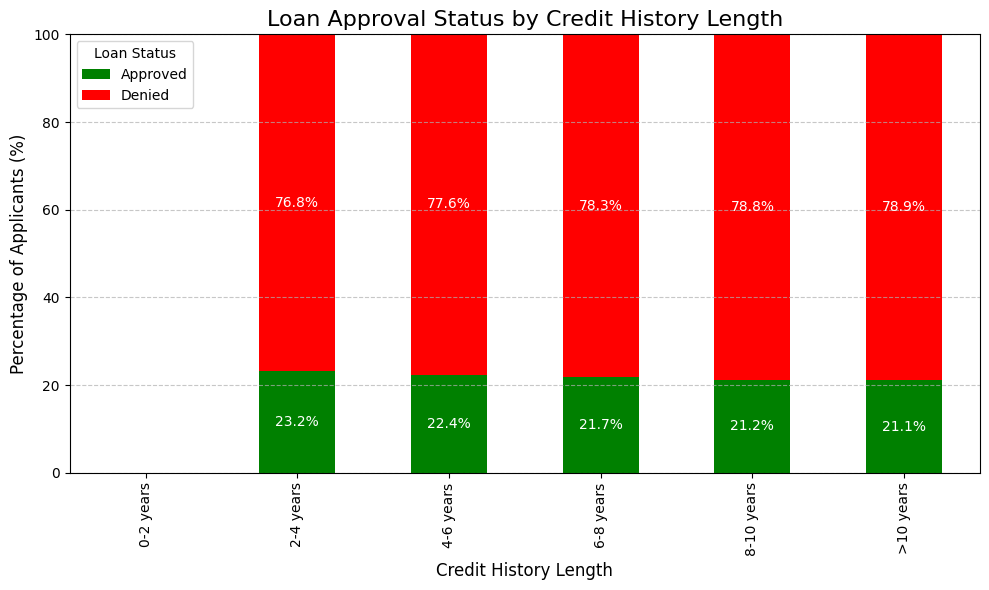

In [339]:
# Create a copy to avoid modifying the original DataFrame
df_history = df[['Credit_History_Length', 'Loan_Status']].copy()

# Ensure 'Credit_History_Length' is numeric
df_history['Credit_History_Length'] = pd.to_numeric(df_history['Credit_History_Length'], errors='coerce')

# Remove invalid rows
df_history = df_history.dropna(subset=['Credit_History_Length', 'Loan_Status'])

# Bin Credit History Length into categories
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2 years', '2-4 years', '4-6 years', '6-8 years', '8-10 years', '>10 years']
df_history['Credit_History_Group'] = pd.cut(df_history['Credit_History_Length'], bins=bins, labels=labels, right=False)

# Standardize and clean the data
df_history['Loan_Status'] = df_history['Loan_Status'].str.strip().str.capitalize()

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts
history_loan_status = df_history.groupby(['Credit_History_Group', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each credit history group
history_loan_status_percentages = history_loan_status.div(history_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
history_loan_status_percentages = history_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = history_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Loan Approval Status by Credit History Length', fontsize=16)
plt.xlabel('Credit History Length', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(history_loan_status_percentages.index):
    cumulative = 0
    for status, color in zip(loan_status_categories, ['green', 'red']):
        value = history_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

/tmp/ipykernel_962/910657066.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_loan_status = df_credit_score.groupby(['Credit_Score_Group', 'Loan_Status']).size().unstack(fill_value=0)


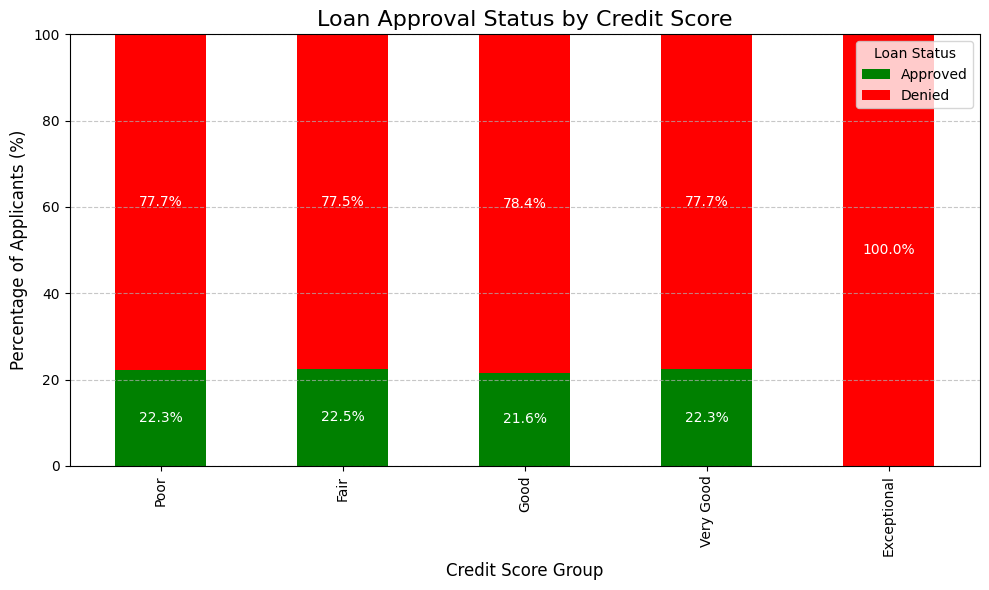

In [340]:
# Create a copy to avoid modifying the original DataFrame
df_credit_score = df[['Credit_Score', 'Loan_Status']].copy()

# Ensure 'Credit_Score' is numeric
df_credit_score['Credit_Score'] = pd.to_numeric(df_credit_score['Credit_Score'], errors='coerce')

# Remove invalid rows
df_credit_score = df_credit_score.dropna(subset=['Credit_Score', 'Loan_Status'])

# Bin Credit Score into categories
bins_credit_score = [0, 580, 670, 740, 800, float('inf')]
labels_credit_score = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
df_credit_score['Credit_Score_Group'] = pd.cut(df_credit_score['Credit_Score'], bins=bins_credit_score, labels=labels_credit_score, right=False)

# Standardize and clean the data
df_credit_score['Loan_Status'] = df_credit_score['Loan_Status'].str.strip().str.capitalize()

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts
credit_score_loan_status = df_credit_score.groupby(['Credit_Score_Group', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each credit score group
credit_score_loan_status_percentages = credit_score_loan_status.div(credit_score_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
credit_score_loan_status_percentages = credit_score_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = credit_score_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Loan Approval Status by Credit Score', fontsize=16)
plt.xlabel('Credit Score Group', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(credit_score_loan_status_percentages.index):
    cumulative = 0
    for status, color in zip(loan_status_categories, ['green', 'red']):
        value = credit_score_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

why tf

In [341]:
group_sizes = df_credit_score['Credit_Score_Group'].value_counts()
print(group_sizes)

Credit_Score_Group
Fair           26806
Good           11196
Poor            6901
Very Good         94
Exceptional        3
Name: count, dtype: int64


In [342]:
print(df[df['Credit_Score'] >= 800])

       Person_Age Person_Gender Person_Education  Person_Income  \
183           144          Male        Associate       241424.0   
575           123        Female      High School        97140.0   
32297         144        Female        Associate      7200766.0   

       Person_Employment_Experience Person_Home_Ownership  Loan_Amount  \
183                             121              Mortgage       6000.0   
575                             101                  Rent      20400.0   
32297                           124              Mortgage       5000.0   

      Loan_Intent Loan_Interest_Rate Loan_Percent_Income  \
183     Education             11.86%                  2%   
575     Education             10.25%                 21%   
32297    Personal             12.73%                  0%   

       Credit_History_Length  Credit_Score Previous_Loan_Defaults Loan_Status  \
183                      2.0           807                     No      Denied   
575                      3.0   

In [343]:
exceptional_group = df_credit_score[df_credit_score['Credit_Score_Group'] == 'Exceptional']
print(exceptional_group)

       Credit_Score Loan_Status Credit_Score_Group
183             807      Denied        Exceptional
575             805      Denied        Exceptional
32297           850      Denied        Exceptional


Upon close examination of the dataset, it has been observed that the "Exceptional" credit score group contains only three entries. This minimal sample size is insufficient to draw statistically reliable or meaningful conclusions about the loan approval status within this category. The 100% denial rate reflected in the analysis is, therefore, a consequence of the limited representation and should not be interpreted as indicative of broader trends or practices.

Given the insufficient data for this group, it is recommended that findings related to "Exceptional" credit scores be approached with caution or, preferably, omitted from any substantive analysis. Future assessments would greatly benefit from a more balanced and comprehensive dataset that includes a larger number of observations across all credit score groups.

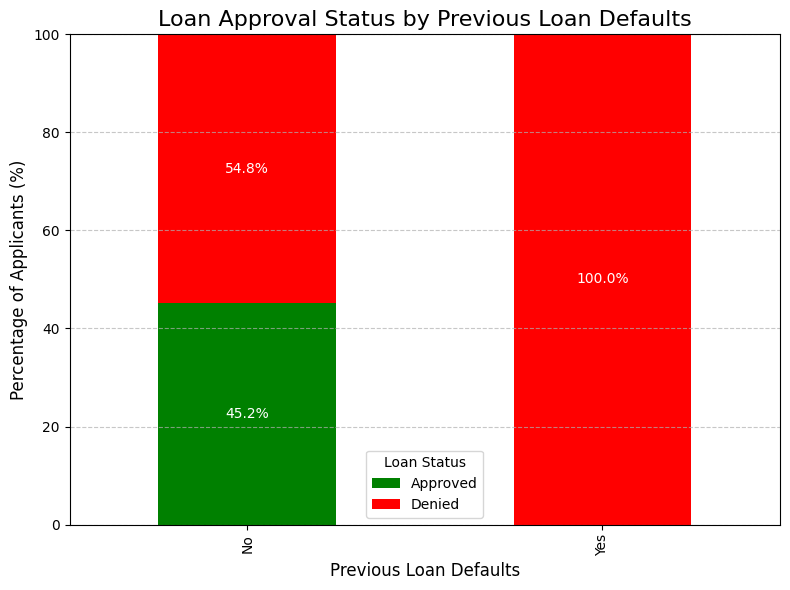

In [344]:
# Create a copy to avoid modifying the original DataFrame
df_defaults = df[['Previous_Loan_Defaults', 'Loan_Status']].copy()

# Standardize and clean the data
df_defaults['Previous_Loan_Defaults'] = df_defaults['Previous_Loan_Defaults'].str.strip().str.capitalize()
df_defaults['Loan_Status'] = df_defaults['Loan_Status'].str.strip().str.capitalize()

# Remove invalid rows
df_defaults = df_defaults.dropna(subset=['Previous_Loan_Defaults', 'Loan_Status'])

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts
defaults_loan_status = df_defaults.groupby(['Previous_Loan_Defaults', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each previous loan defaults category
defaults_loan_status_percentages = defaults_loan_status.div(defaults_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
defaults_loan_status_percentages = defaults_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = defaults_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Loan Approval Status by Previous Loan Defaults', fontsize=16)
plt.xlabel('Previous Loan Defaults', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(defaults_loan_status_percentages.index):
    cumulative = 0
    for status, color in zip(loan_status_categories, ['green', 'red']):
        value = defaults_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

In [345]:
print(df_defaults.isna().sum())
print(df_defaults['Previous_Loan_Defaults'].unique())
print(df_defaults['Loan_Status'].unique())
print(defaults_loan_status)

Previous_Loan_Defaults    0
Loan_Status               0
dtype: int64
['No' 'Yes']
['Approved' 'Denied']
Loan_Status             Approved  Denied
Previous_Loan_Defaults                  
No                         10000   12142
Yes                            0   22858


)

/tmp/ipykernel_962/2884838297.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percent_income_loan_status = df_percent_income.groupby(['Loan_Percent_Group', 'Loan_Status']).size().unstack(fill_value=0)


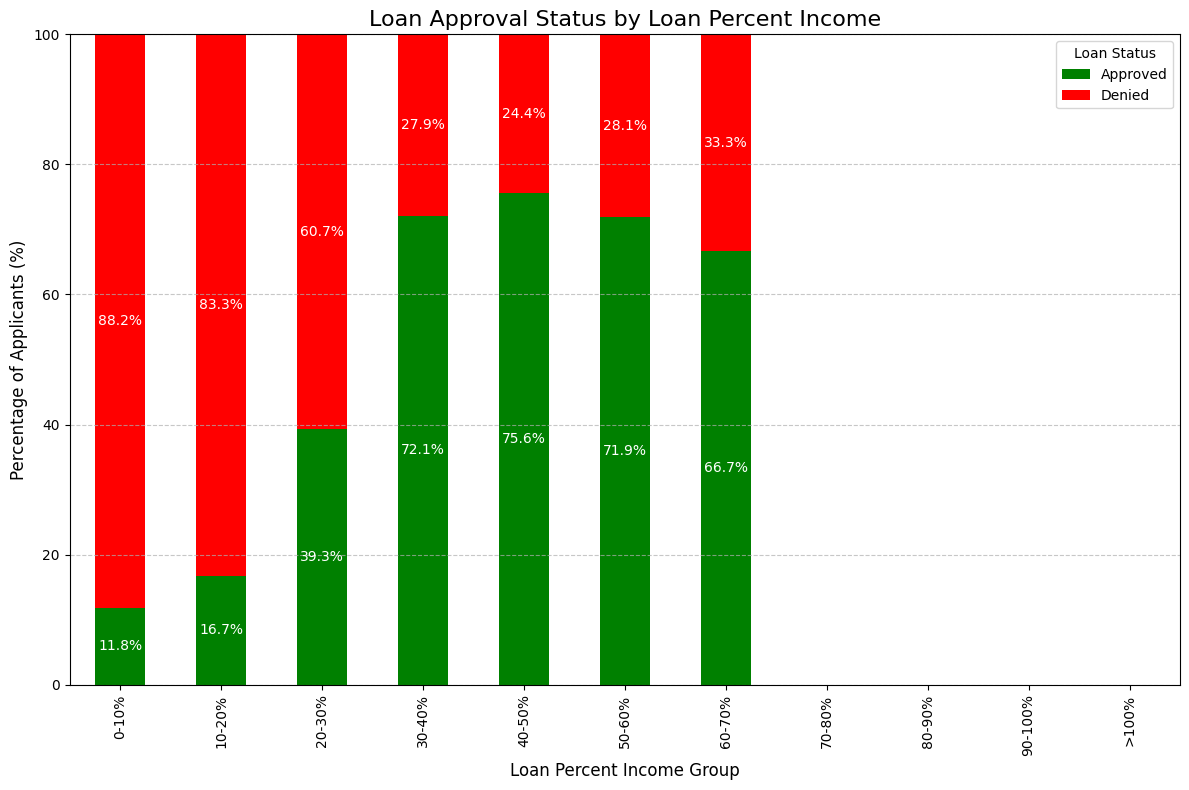

In [347]:
# Create a copy to avoid modifying the original DataFrame
df_percent_income = df[['Loan_Percent_Income', 'Loan_Status']].copy()

# Ensure 'Loan_Percent_Income' is numeric
df_percent_income['Loan_Percent_Income'] = df_percent_income['Loan_Percent_Income'].str.replace('%', '').astype(float)

# Remove invalid rows
df_percent_income = df_percent_income.dropna(subset=['Loan_Percent_Income', 'Loan_Status'])

# Bin Loan_Percent_Income into groups of 10%
bins_percent_income = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
labels_percent_income = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%', '>100%']
df_percent_income['Loan_Percent_Group'] = pd.cut(df_percent_income['Loan_Percent_Income'], bins=bins_percent_income, labels=labels_percent_income, right=False, include_lowest=True)

# Standardize and clean the data
df_percent_income['Loan_Status'] = df_percent_income['Loan_Status'].str.strip().str.capitalize()

# Define loan status categories
loan_status_categories = ['Approved', 'Denied']

# Create a cross-tabulation of counts
percent_income_loan_status = df_percent_income.groupby(['Loan_Percent_Group', 'Loan_Status']).size().unstack(fill_value=0)

# Calculate percentages for each Loan_Percent_Group
percent_income_loan_status_percentages = percent_income_loan_status.div(percent_income_loan_status.sum(axis=1), axis=0) * 100

# Ensure Loan_Status columns are in desired order
percent_income_loan_status_percentages = percent_income_loan_status_percentages.reindex(columns=loan_status_categories, fill_value=0)

# Plot the stacked bar chart
ax = percent_income_loan_status_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'red'])

plt.title('Loan Approval Status by Loan Percent Income', fontsize=16)
plt.xlabel('Loan Percent Income Group', fontsize=12)
plt.ylabel('Percentage of Applicants (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each segment with percentage
for i, group in enumerate(percent_income_loan_status_percentages.index):
    cumulative = 0
    for status, color in zip(loan_status_categories, ['green', 'red']):
        value = percent_income_loan_status_percentages.loc[group][status]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

1. General Trends
There is a clear relationship between the loan percent income and the likelihood of loan approval.
As the percentage of income that the loan represents increases, the loan denial rate generally rises, especially in lower-income brackets.
Approval rates are significantly higher in the middle ranges of loan percent income (20%-60%).
2. Breakdown by Loan Percent Income Groups
0–10%:

Approval Rate: 11.8%
Denial Rate: 88.2%
Surprisingly, applicants requesting loans that constitute only 0–10% of their income face the highest denial rates. This could be due to other factors such as poor creditworthiness or other unfavorable financial indicators.
10–20%:

Approval Rate: 16.7%
Denial Rate: 83.3%
While marginally better than the 0–10% group, this category still has a high denial rate, which may again point to external factors beyond the loan-to-income ratio.
20–30%:

Approval Rate: 39.3%
Denial Rate: 60.7%
A notable improvement in approval rates begins here, indicating that this range might represent a more balanced loan-to-income ratio that aligns better with approval criteria.
30–40%:

Approval Rate: 72.1%
Denial Rate: 27.9%
This group shows one of the highest approval rates, suggesting that loans in this range are perceived as affordable by lenders.
40–50%:

Approval Rate: 75.6%
Denial Rate: 24.4%
Similar to the 30–40% group, this range enjoys a high approval rate, reinforcing the notion that loans within 30–50% of income are generally viewed as manageable.
50–60%:

Approval Rate: 71.9%
Denial Rate: 28.1%
Approval rates remain strong but dip slightly compared to the 40–50% group, likely reflecting an increased risk associated with higher loan-to-income ratios.
60–70%:

Approval Rate: 66.7%
Denial Rate: 33.3%
Approval rates begin to decline as loan amounts become a larger proportion of income.
3. Key Observations
Counterintuitive Denial Rates at Lower Loan Percentages:

Applicants in the 0–10% and 10–20% income groups face surprisingly high denial rates. This may be influenced by:
Poor credit histories.
Low income despite the low loan request amount.
Other unfavorable financial metrics not reflected in the loan percent income alone.
Optimal Approval Ranges:

Loan amounts that are 20–50% of income appear to strike a balance between affordability and lender risk, yielding the highest approval rates.
Declining Approval Rates Beyond 50%:

As the loan percent income exceeds 50%, approval rates begin to drop, reflecting lender concerns about the borrower’s ability to manage repayment alongside existing financial obligations.
4. Implications
The relationship between loan percent income and approval status is not linear, suggesting that other factors (e.g., credit score, employment stability, existing debt) heavily influence approval decisions.
Lower approval rates at both ends of the spectrum (0–10% and >60%) highlight that both excessively conservative and ambitious loan requests are viewed less favorably.


In [351]:
# Initialize a dictionary to store the optimal values
perfect_person = {}

# Function to calculate approval rates and get the value with the highest rate
def get_optimal_value(df, variable, bins=None, labels=None):
    temp_df = df.copy()
    if bins is not None and labels is not None:
        temp_df[variable + '_Group'] = pd.cut(temp_df[variable], bins=bins, labels=labels)
        group_var = variable + '_Group'
    else:
        group_var = variable
    # Calculate approval rates with observed=True to suppress the warning
    approval_rates = temp_df.groupby(group_var, observed=True)['Loan_Status'].apply(lambda x: (x == 'Approved').mean()).reset_index()
    approval_rates = approval_rates.dropna(subset=['Loan_Status'])
    max_rate = approval_rates['Loan_Status'].max()
    optimal_values = approval_rates[approval_rates['Loan_Status'] == max_rate][group_var].tolist()
    total_categories = temp_df[group_var].nunique()

    # If all categories have the same approval rate, it does not matter
    if approval_rates['Loan_Status'].nunique() == 1:
        return 'Does not matter'
    # If multiple optimal values exist, return them
    elif len(optimal_values) == 1:
        return optimal_values[0]
    else:
        return optimal_values

# Ensure necessary columns are in correct format
import pandas as pd

# Convert numerical columns
numerical_cols = ['Person_Age', 'Person_Income', 'Person_Employment_Experience', 'Loan_Amount',
                  'Loan_Interest_Rate', 'Loan_Percent_Income', 'Credit_History_Length', 'Credit_Score']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('[\$,%,]', '', regex=True), errors='coerce')

# Standardize categorical variables
categorical_vars = ['Person_Gender', 'Person_Education', 'Person_Home_Ownership',
                    'Loan_Intent', 'Previous_Loan_Defaults', 'Loan_Status']
for var in categorical_vars:
    df[var] = df[var].astype(str).str.strip().str.capitalize()

# Remove rows with missing Loan_Status
df = df.dropna(subset=['Loan_Status'])

# Person Age (Binned)
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['0-24', '25-34', '35-44', '45-54', '55-64', '65+']
perfect_person['Person_Age'] = get_optimal_value(df, 'Person_Age', bins=age_bins, labels=age_labels)

# Person Gender
perfect_person['Person_Gender'] = get_optimal_value(df, 'Person_Gender')

# Person Education
perfect_person['Person_Education'] = get_optimal_value(df, 'Person_Education')

# Person Income (Binned)
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '>100k']
perfect_person['Person_Income'] = get_optimal_value(df, 'Person_Income', bins=income_bins, labels=income_labels)

# Person Employment Experience (Binned)
experience_bins = [0, 2, 5, 10, 20, float('inf')]
experience_labels = ['0-1', '2-4', '5-9', '10-19', '20+']
perfect_person['Person_Employment_Experience'] = get_optimal_value(df, 'Person_Employment_Experience', bins=experience_bins, labels=experience_labels)

# Person Home Ownership
perfect_person['Person_Home_Ownership'] = get_optimal_value(df, 'Person_Home_Ownership')

# Loan Amount (Binned)
loan_amount_bins = [0, 5000, 10000, 15000, 20000, 40000, float('inf')]
loan_amount_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-40k', '>40k']
perfect_person['Loan_Amount'] = get_optimal_value(df, 'Loan_Amount', bins=loan_amount_bins, labels=loan_amount_labels)

# Loan Intent
perfect_person['Loan_Intent'] = get_optimal_value(df, 'Loan_Intent')

# Loan Interest Rate (Binned)
interest_bins = [0, 5, 10, 15, 20, 25, float('inf')]
interest_labels = ['0-4%', '5-9%', '10-14%', '15-19%', '20-24%', '25%+']
perfect_person['Loan_Interest_Rate'] = get_optimal_value(df, 'Loan_Interest_Rate', bins=interest_bins, labels=interest_labels)

# Loan Percent Income (Binned)
percent_income_bins = [0, 20, 40, 60, 80, 100, float('inf')]
percent_income_labels = ['0-19%', '20-39%', '40-59%', '60-79%', '80-99%', '100%+']
perfect_person['Loan_Percent_Income'] = get_optimal_value(df, 'Loan_Percent_Income', bins=percent_income_bins, labels=percent_income_labels)

# Credit History Length (Binned)
history_bins = [0, 2, 4, 6, 8, 10, float('inf')]
history_labels = ['0-1 yrs', '2-3 yrs', '4-5 yrs', '6-7 yrs', '8-9 yrs', '10+ yrs']
perfect_person['Credit_History_Length'] = get_optimal_value(df, 'Credit_History_Length', bins=history_bins, labels=history_labels)

# Credit Score (Binned)
credit_score_bins = [0, 580, 670, 740, 800, float('inf')]
credit_score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
perfect_person['Credit_Score'] = get_optimal_value(df, 'Credit_Score', bins=credit_score_bins, labels=credit_score_labels)

# Previous Loan Defaults
perfect_person['Previous_Loan_Defaults'] = get_optimal_value(df, 'Previous_Loan_Defaults')

# Print the parameters of the "perfect" person
print("Parameters of the 'Perfect' Person for Loan Approval:")
for key, value in perfect_person.items():
    if isinstance(value, list):
        print(f"{key}: {', '.join(map(str, value))}")
    else:
        print(f"{key}: {value}")

Parameters of the 'Perfect' Person for Loan Approval:
Person_Age: 55-64
Person_Gender: Female
Person_Education: Doctorate
Person_Income: 0-20k
Person_Employment_Experience: 0-1
Person_Home_Ownership: Other
Loan_Amount: 20k-40k
Loan_Intent: Debtconsolidation
Loan_Interest_Rate: 15-19%
Loan_Percent_Income: 40-59%
Credit_History_Length: 0-1 yrs
Credit_Score: Fair
Previous_Loan_Defaults: No


this is the "perfect" person